<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, the project is accepted. Keep up the good work on the next sprint! :)

</div>

# Review
Hi, my name is Dmitry and I will be reviewing your project.

You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If everything is done successfully.
</div>

<div class="alert alert-warning">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't remove my comments, as it will make further review iterations much harder for me.

Feel free to reply to my comments or ask questions using the following template:

<div class="alert alert-info">
    For your comments and questions.
</div>

First of all, thank you for turning in the project! You did an excellent job.

# Project Description
Previous analysis shows cost savings in retaining customers to the acquisition of new once. With Customers living Beta Bank, the banks wants to be able to predict whether a customer would leave or not with an expected f1_score of 0.59.

# Business Goal

Analysis Bata Bank's data for insights on;
1. Class balance,
2. Build a model for prediction without adjusting for class imbalance.
3. Improve model quality by adjusting for class imbalance.
4. Use test data on model.
5. Provide recommendations.

In [1]:
import pandas as pd 
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_auc_score,make_scorer,f1_score,confusion_matrix, plot_confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE,RandomOverSampler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def data_info(df):
    print('Head:-')
    print()
    display(df.head())
    print('**END**')
    print('Info:-')
    display(df.info())
    print('*END*')
    print('Describe:-')
    display(df.describe()) 
    print('*END**')
    print('NUll_values')
    display(df.isnull().sum()/df.shape[0])
    print('*END**')
    print('Duplicated:-')
    display(df.duplicated().sum())
    

In [3]:
try:
    bb_df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
except:
    bb_df = pd.read_csv('/datasets/Churn.csv')

In [4]:
data_info(bb_df)

Head:-



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**END**
Info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

*END*
Describe:-


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


*END**
NUll_values


RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

*END**
Duplicated:-


0

## Conclusion
Beta bank dataset has 10000 entries, float64(3), int64(8) and object(3). Tenure is a column with null entries of about 9% of column values. Reasons for the missing values could be as a result of investment not reaching full year of maturity or lost in data extraction.

<div class="alert alert-success">
<b>Reviewer's comment</b>
    
Alright, the data was loaded and inspected. The proposed possible reasons for missing tenure values seem reasonable.

</div>

In [5]:
bb_df[bb_df['Tenure'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [6]:
bb_df.Tenure.value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [7]:
bb_df['Tenure'] = bb_df['Tenure'].fillna(bb_df['Tenure'].mode().iloc[0])

In [8]:
bb_df.Tenure.value_counts()

1.0     1861
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64

## Conclusion
With the entries in the Tenure column categorical in nature, the mode of the most frequent group was used to replace the null values. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok!

</div>

0    7963
1    2037
Name: Exited, dtype: int64
CLASS RATIO 4:1 



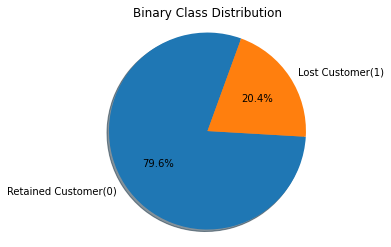

In [9]:
print(bb_df.Exited.value_counts())

retained, lost = bb_df.Exited.value_counts()
print('CLASS RATIO {}:{}'.format(int(math.ceil(retained/lost)),int(lost/lost)),'\n')


plt.pie([retained, lost],labels=['Retained Customer(0)','Lost Customer(1)'],
        autopct='%1.1f%%',shadow=True, startangle=70)
plt.title('Binary Class Distribution')
plt.axis('equal')
plt.show()

## Conclusion

At the moment, the ratio of retained customers to those who have left are 4:1. Meaning for every 4 customers acquired, 1 would leave thereby creating an imbalance in the dataset. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Class balance was examined

</div>

In [10]:
bb_df = bb_df.drop(['RowNumber','CustomerId','Surname'],axis=1)
bb_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


These columns have been removed from the dataset as they would have little/no impact in the determining whether a customer stays or leaves the bank.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Makes sense

</div>

In [11]:
bb_df = pd.get_dummies(bb_df,drop_first= True)
bb_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


<div class="alert alert-success">
<b>Reviewer's comment</b>

Categorical features were encoded using OHE

</div>

In [12]:
features = bb_df.drop('Exited',axis=1)
target = bb_df.Exited

In [13]:
x_train,x_test,y_train,y_test = train_test_split(features,target, test_size=0.2, random_state=123)
x_train, x_val, y_train,y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=123)

In [14]:
x_train.shape,x_test.shape

((6400, 11), (2000, 11))

In [15]:
print(f"Train = {100*len(x_train)/len(bb_df):.2f}%")
print(f"Val = {100*len(x_val)/len(bb_df):.2f}%")
print(f"Test = {100*len(x_test)/len(bb_df):.2f}%")

Train = 64.00%
Val = 16.00%
Test = 20.00%


## Conclusion

The data has been divided into training, test and validation sets.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was reasonably split into train, validation and test sets

</div>

## Logistic Regression

Accuracy_score: 0.79625
AUC ROC score: 0.6405899163094508
F1_score: 0.029761904761904764
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1278
           1       0.36      0.02      0.03       322

    accuracy                           0.80      1600
   macro avg       0.58      0.50      0.46      1600
weighted avg       0.71      0.80      0.71      1600



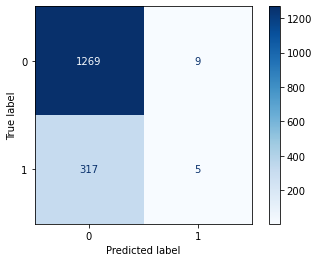

In [16]:
model = LogisticRegression(random_state=123,solver='liblinear')
model.fit(x_train,y_train)
print('Accuracy_score:', model.score(x_val,y_val))
print('AUC ROC score:', roc_auc_score(y_val,model.predict_proba(x_val)[:,1]))
print('F1_score:', f1_score(y_val,model.predict(x_val)))
print(classification_report(y_val,model.predict(x_val)))
disp = plot_confusion_matrix(model, x_val, y_val,cmap='Blues')

## Conclusion
Without accounting for class imbalance, the model f1_score is very low. This can be improved with class imbalance adjustments.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, now we can check if balancing techinques make any difference

</div>

## Data Normalization

In [17]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Scaling is applied correctly!

</div>

Accuracy_score: 0.80875
AUC ROC score: 0.7586825299623831
F1_score: 0.2816901408450704
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1278
           1       0.58      0.19      0.28       322

    accuracy                           0.81      1600
   macro avg       0.70      0.58      0.59      1600
weighted avg       0.77      0.81      0.77      1600



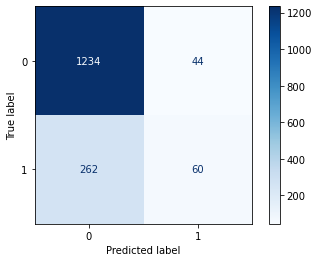

In [18]:
model = LogisticRegression(random_state=123,solver='liblinear')
model.fit(x_train,y_train)
print('Accuracy_score:', model.score(x_val,y_val))
print('AUC ROC score:', roc_auc_score(y_val,model.predict_proba(x_val)[:,1]))
print('F1_score:', f1_score(y_val,model.predict(x_val)))
print(classification_report(y_val,model.predict(x_val)))
disp = plot_confusion_matrix(model, x_val, y_val,cmap='Blues')

Accuracy_score: 0.86375
AUC ROC score: 0.8387255902565149
F1_score: 0.5708661417322834
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1278
           1       0.78      0.45      0.57       322

    accuracy                           0.86      1600
   macro avg       0.83      0.71      0.74      1600
weighted avg       0.86      0.86      0.85      1600



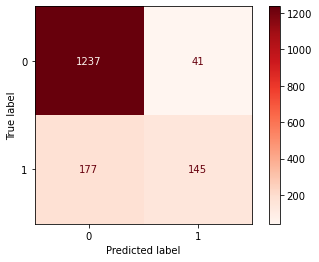

In [19]:
model = RandomForestClassifier(random_state=123,n_estimators=100)
model.fit(x_train,y_train)
print('Accuracy_score:', model.score(x_val,y_val))
print('AUC ROC score:', roc_auc_score(y_val,model.predict_proba(x_val)[:,1]))
print('F1_score:', f1_score(y_val,model.predict(x_val)))
print(classification_report(y_val,model.predict(x_val)))
disp = plot_confusion_matrix(model, x_val, y_val,cmap='Reds')

Scaling and transforming of the data rather made the f1_score,accuracy_score and auc_roc_score increase.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

If I'm reading it correctly, the F1 score of the linear regression model also increased after applying standard scaling (from 0.03 to 0.28)

</div>

## Accounting for class imbalance

### Logistic Regression

Accuracy_score: 0.705625
AUC ROC score: 0.7612146307798482
F1_score: 0.484118291347207
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1278
           1       0.37      0.69      0.48       322

    accuracy                           0.71      1600
   macro avg       0.64      0.70      0.64      1600
weighted avg       0.79      0.71      0.73      1600



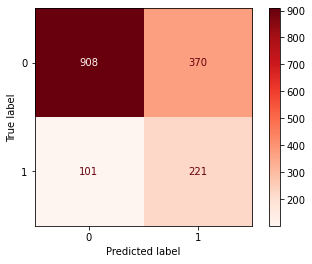

In [20]:
model = LogisticRegression(random_state=123,solver='liblinear',class_weight='balanced')
model.fit(x_train,y_train)
print('Accuracy_score:', model.score(x_val,y_val))
print('AUC ROC score:', roc_auc_score(y_val,model.predict_proba(x_val)[:,1]))
print('F1_score:', f1_score(y_val,model.predict(x_val)))
print(classification_report(y_val,model.predict(x_val)))
disp = plot_confusion_matrix(model, x_val, y_val,cmap='Reds')

### Random Forest

Accuracy_score: 0.83625
AUC ROC score: 0.8475223320599928
F1_score: 0.599388379204893
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1278
           1       0.59      0.61      0.60       322

    accuracy                           0.84      1600
   macro avg       0.75      0.75      0.75      1600
weighted avg       0.84      0.84      0.84      1600



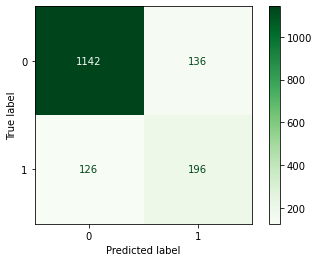

In [21]:
model = RandomForestClassifier(random_state=123,n_estimators=100,class_weight='balanced',max_depth=9)
model.fit(x_train,y_train)
print('Accuracy_score:', model.score(x_val,y_val))
print('AUC ROC score:', roc_auc_score(y_val,model.predict_proba(x_val)[:,1]))
print('F1_score:', f1_score(y_val,model.predict(x_val)))
print(classification_report(y_val,model.predict(x_val)))
disp = plot_confusion_matrix(model, x_val, y_val,cmap='Greens')

## Conclusion

By using class weight=Balanced, both logistic Regressions and Random Forest had there f1_score improve from 0.28 to 0.48  and 0.57 to 0.6 respectively.

### Resampling  

Accuracy_score: 0.705625
AUC ROC score: 0.761180610231437
F1_score: 0.484118291347207
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1278
           1       0.37      0.69      0.48       322

    accuracy                           0.71      1600
   macro avg       0.64      0.70      0.64      1600
weighted avg       0.79      0.71      0.73      1600



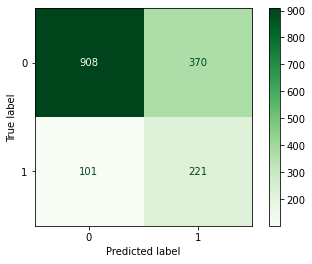

In [22]:
x_resampled,y_resampled = RandomOverSampler().fit_resample(x_train,y_train)

model = LogisticRegression(random_state=123,solver='liblinear',class_weight='balanced')
model.fit(x_resampled,y_resampled)
print('Accuracy_score:', model.score(x_val,y_val))
print('AUC ROC score:', roc_auc_score(y_val,model.predict_proba(x_val)[:,1]))
print('F1_score:', f1_score(y_val,model.predict(x_val)))
print(classification_report(y_val,model.predict(x_val)))
disp = plot_confusion_matrix(model, x_val, y_val,cmap='Greens')

Accuracy_score: 0.826875
AUC ROC score: 0.8478503873482441
F1_score: 0.6014388489208633
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1278
           1       0.56      0.65      0.60       322

    accuracy                           0.83      1600
   macro avg       0.73      0.76      0.75      1600
weighted avg       0.84      0.83      0.83      1600



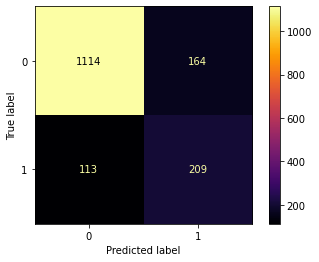

In [23]:
model = RandomForestClassifier(random_state=123,n_estimators=100,max_depth=9)
model.fit(x_resampled,y_resampled)
print('Accuracy_score:', model.score(x_val,y_val))
print('AUC ROC score:', roc_auc_score(y_val,model.predict_proba(x_val)[:,1]))
print('F1_score:', f1_score(y_val,model.predict(x_val)))
print(classification_report(y_val,model.predict(x_val)))
disp = plot_confusion_matrix(model, x_val, y_val,cmap='inferno')

## Conclusion
With the use of resampling method, both models f1_scores have improved with Random forest having an f1_score of 0.60.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you tried two different techniques to deal with class imbalance and two different models. Train and validation set were utilized correctly

</div>

## Final Test

Accuracy_score: 0.8295
AUC ROC score: 0.8684366832976954
F1_score: 0.6297502714440826
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1586
           1       0.57      0.70      0.63       414

    accuracy                           0.83      2000
   macro avg       0.74      0.78      0.76      2000
weighted avg       0.85      0.83      0.84      2000

Accuracy_score: 0.830625
AUC ROC score: 0.8468346309742513
F1_score: 0.6055312954876274
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1278
           1       0.57      0.65      0.61       322

    accuracy                           0.83      1600
   macro avg       0.74      0.76      0.75      1600
weighted avg       0.84      0.83      0.83      1600



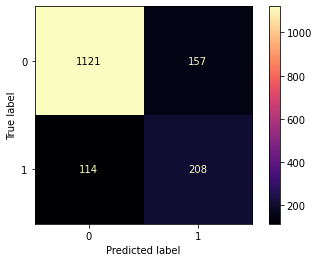

In [24]:
x_resampled,y_resampled = RandomOverSampler().fit_resample(x_train,y_train)
model = RandomForestClassifier(random_state=123,n_estimators=100,max_depth=9)
model.fit(x_resampled,y_resampled)
print('Accuracy_score:', model.score(x_test,y_test))
print('AUC ROC score:', roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))
print('F1_score:', f1_score(y_test,model.predict(x_test)))
print(classification_report(y_test,model.predict(x_test)))

print('Accuracy_score:', model.score(x_val,y_val))
print('AUC ROC score:', roc_auc_score(y_val,model.predict_proba(x_val)[:,1]))
print('F1_score:', f1_score(y_val,model.predict(x_val)))
print(classification_report(y_val,model.predict(x_val)))
disp = plot_confusion_matrix(model, x_val, y_val,cmap='magma')

<div class="alert alert-success">
<b>Reviewer's comment</b>

The F1 score is above the threshold

</div>

## Conclusion

Overall, Random Forest model provided better f1_score than logistic Regression.